# Bibliotecas e Drive

In [6]:
from sklearn.utils.fixes import sklearn
import numpy as np
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
)
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold
from numpy import where
from numpy import meshgrid
from numpy import arange
from numpy import hstack
from matplotlib import pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import scipy.io as sio
from numpy.linalg import inv
from numpy import where
from numpy import meshgrid
from numpy import arange
from numpy import hstack
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import scipy.io as sio

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
df_Origin = pd.read_csv("/content/drive/Shareddrives/Ufla/Lista2Reconhecimento/flame_data.csv")

# ID3

In [ ]:
if Dinheiro == 'Muito':
  if Compromisso == 'Sim':
    if Tempo == 'Chuvoso':
      Sextou = 'Netflix'
    else:
      Sextou = 'Bar'
  else:
    if Tempo == 'Chuvoso':
      Sextou = 'Bar'
    else:
      Sextou = 'Netflix'
else:
  if Compromisso == 'Sim':
    if Tempo == 'Chuvoso':
      Sextou = 'Netflix'
    else:
      Sextou = 'Bar'
  else:
    Sextou = 'Netflix'

# Algoritmo

In [8]:
def plot_data(X, y, name):
    markers_ = ['o', 'v']
    for class_value in range(2):

        row_ix = where(y == class_value)
        nome = "Class " + str(class_value) + " " + name

        ax.scatter(X[row_ix, 0], X[row_ix, 1], cmap='Paired', label = nome, marker = markers_[class_value])

In [9]:
df_Origin['y'].value_counts()

 1.0    1001
-1.0     500
Name: y, dtype: int64

<Axes: title={'center': 'Plotagem dos dados'}>

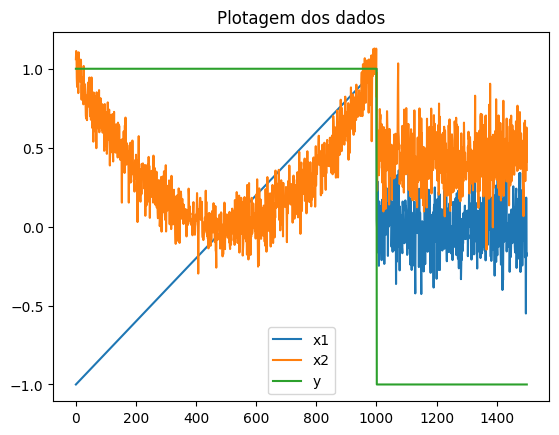

In [10]:
df_Origin.plot(title="Plotagem dos dados")

In [11]:
df = df_Origin
X = df[['x1','x2']]
y = df['y']

y.replace(1,0,inplace=True)
y.replace(-1,1,inplace=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

poly = PolynomialFeatures(degree=2)
X_train_scaled_poly = poly.fit_transform(X_train_scaled)
X_test_scaled_poly = poly.transform(X_test_scaled)

las_scale_poly_TEST = LassoCV()
las_scale_poly_TEST.fit(X_train_scaled_poly, y_train)

print(f'Lasso Scaled Polynomial Regression R^2 - Train set: {las_scale_poly_TEST.score(X_train_scaled_poly, y_train):.3f}')
print(f'Lasso Scaled Polynomial Regression R^2 - Test set: {las_scale_poly_TEST.score(X_test_scaled_poly, y_test):.3f}')
print(f'RMSE on test set: {mean_squared_error(y_test, las_scale_poly_TEST.predict(X_test_scaled_poly),  squared=False):.3f}')

Lasso Scaled Polynomial Regression R^2 - Train set: 0.747
Lasso Scaled Polynomial Regression R^2 - Test set: 0.755
RMSE on test set: 0.233


In [12]:
X_train.shape

(1050, 2)

In [13]:
y_train.shape

(1050,)

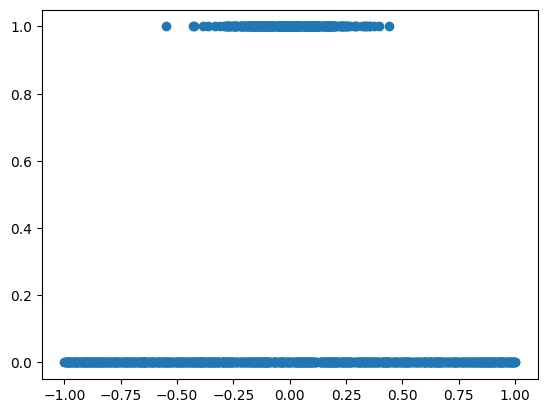

In [14]:
plt.scatter(X_train['x1'],y_train)

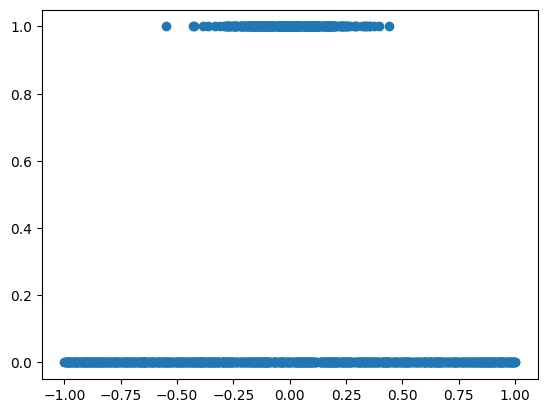

In [15]:
plt.scatter(X_train['x1'],y_train)

# Arvore de decisão

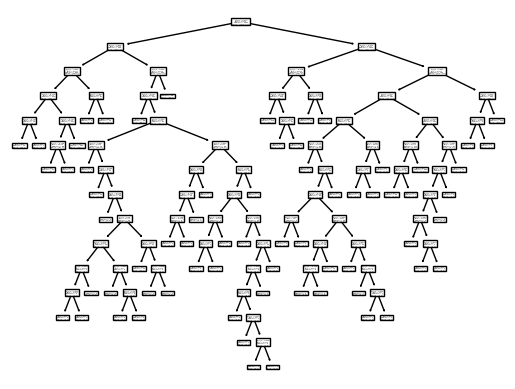

In [16]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y.astype(float))
tree.plot_tree(clf)
y_pred = clf.predict(X_test)

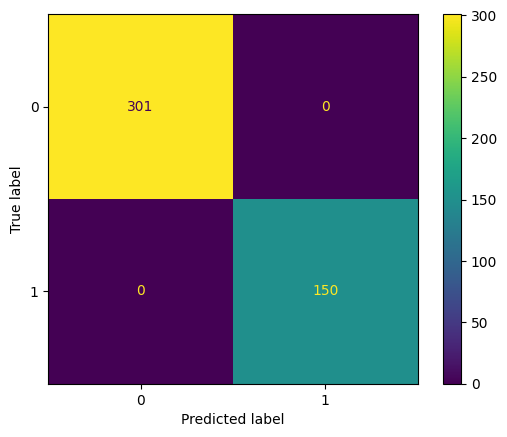

In [17]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot();

# MLP

Coefficients: 
 [0.00315894 0.32428573]
Mean squared error: 0.00
Coefficient of determination: 1.00


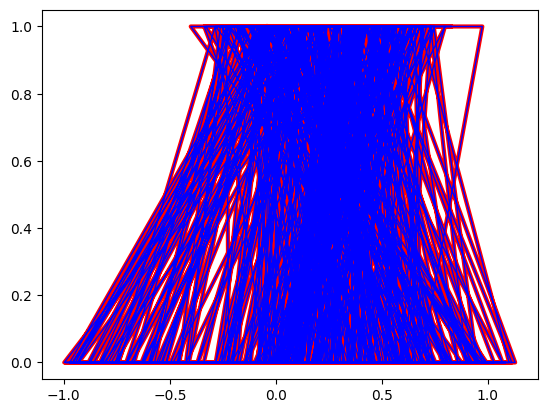

In [18]:
reg = LinearRegression().fit(X, y)
reg.predict(X)
print("Coefficients: \n", reg.coef_)
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))
plt.plot(X_test, y_test, color="red",linewidth=3)
plt.plot(X_test, y_pred, color="blue", linewidth=1)
y_pred = reg.predict(X_test)
plt.show()

# Random Forest

In [19]:
clf = RandomForestClassifier(n_estimators = 100)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))

ACCURACY OF THE MODEL:  0.9711751662971175


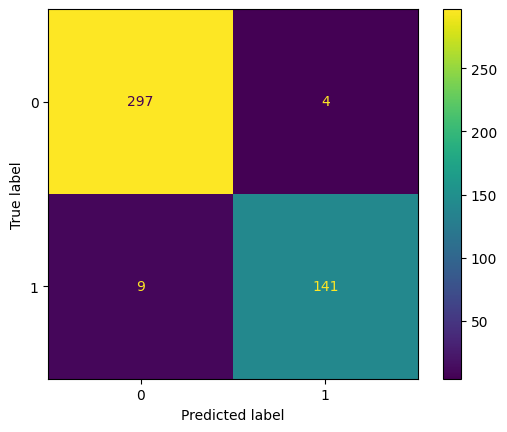

In [20]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot();

# SVM Linear

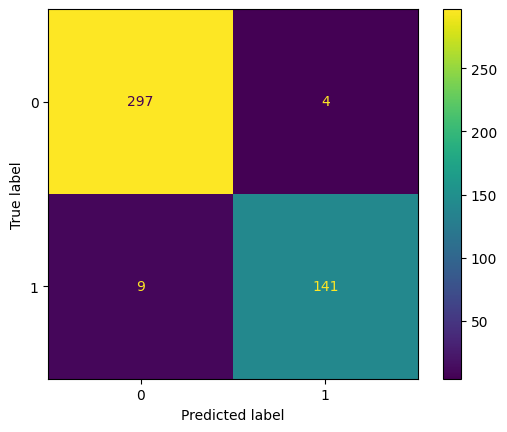

In [21]:
clf = svm.SVC()
clf.fit(X, y)
SVC()
clf.support_vectors_
clf.support_
clf.n_support_
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot();